In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import ramanspy as rp

In [20]:
num_endmembers = 5
spectral_size = 1000
image_size=100

seed = 1

In [21]:
colors = plt.cm.get_cmap('viridis', num_endmembers)
colormap = ListedColormap(colors(np.arange(num_endmembers)))

/var/folders/pg/fd2gphys32j1fgnzsp5dt6_w0000gn/T/ipykernel_53760/3563064993.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', num_endmembers)


# Generate endmembers

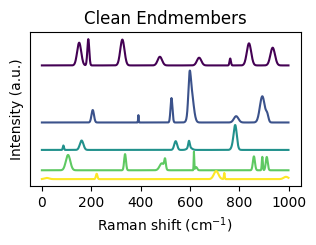

In [51]:
endmembers = rp.synth.generate_spectra(num_endmembers, spectral_size, seed=seed)

plt.figure(figsize=(3.5, 2))
rp.plot.spectra(endmembers, plot_type='single stacked', title='Clean Endmembers')

plt.savefig('clean_endmembers.png', dpi=1200, bbox_inches='tight', transparent=True)

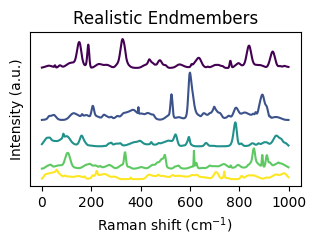

In [52]:
endmembers = rp.synth.generate_spectra(num_endmembers, spectral_size, realistic=True, seed=seed)

plt.figure(figsize=(3.5, 2))
rp.plot.spectra(endmembers, plot_type='single stacked', title='Realistic Endmembers')
plt.savefig('realistic_endmembers.png', dpi=1200, bbox_inches='tight', transparent=True)

# Generate abundance images

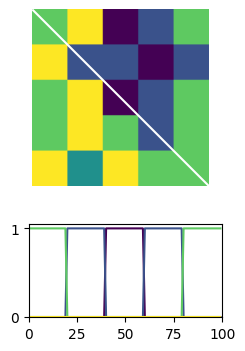

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


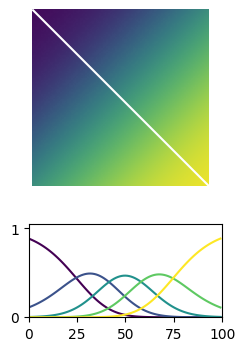

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


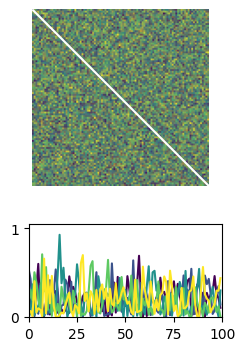

In [54]:
scene_types = ['chessboard', 'gaussian', 'dirichlet']
for scene_type in scene_types:
    image = rp.synth.generate_abundance_scene(image_size, num_endmembers, scene_type, seed=seed)

    # Calculate weighted sum of colors for each pixel
    weighted_image = np.tensordot(image, colormap.colors, axes=([2], [0]))

    # Plot the image
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(2.5, 4), gridspec_kw={'height_ratios': [2, 1]})
    ax1.imshow(weighted_image, cmap=colormap)

    # Draw a line across the diagonal
    ax1.plot([0, image.shape[1]], [0, image.shape[0]], color='white')
    ax1.axis('off')

    diagonal = np.array([image[i, i, :] for i in range(image.shape[0])])

    # Plot the line plot of the channel profile
    # ax2.plot(np.sum(diagonal, axis=1), color='black', label='Sum')
    for i in range(image.shape[2]):
        ax2.plot(diagonal[:, i], color=colors(i))

    # ax2.set_title('Channel Profile along Diagonal')
    # ax2.legend()

    # ax2.set_xticks([0, 100])
    ax2.set_yticks([0, 1])
    ax2.set_ylim([0, 1+0.05])
    ax2.set_xlim([0, 100])

    plt.savefig(f'{scene_type}3.png', dpi=1200, transparent=True)



    plt.show()

# Types of artefacts

### Noise

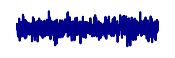

In [41]:
noise_amplitude_in_rp = 0.1

noise = np.random.normal(0, noise_amplitude_in_rp, spectral_size)

plt.figure(figsize=(2, 0.5))
rp.plot.spectra(noise, np.arange(0, spectral_size), title=None, color='darkblue')

plt.axis('off')

plt.savefig('noise.png', dpi=1200, bbox_inches='tight', transparent=True)

### Baseline

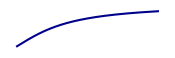

In [42]:
# Polynomial baseline
baseline_amplitude_in_rp = 2

baseline = np.arctan(np.linspace(0, 3.14, spectral_size)) * baseline_amplitude_in_rp

plt.figure(figsize=(2, 0.5))
rp.plot.spectra(baseline, np.arange(0, spectral_size), title=None, color='darkblue')

plt.axis('off')

plt.savefig('baseline.png', dpi=1200, bbox_inches='tight', transparent=True)

### Cosmic spikes

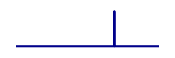

In [46]:
# Cosmic spikes
cosmic_spikes_amplitude_in_rp = 5

cosmic_spike = np.zeros(spectral_size)

spike_position = np.random.randint(2, spectral_size - 2)
spike_height = np.random.uniform(0.75, 1.25) * cosmic_spikes_amplitude_in_rp
cosmic_spike[spike_position] = spike_height

plt.figure(figsize=(2, 0.5))
rp.plot.spectra(cosmic_spike, np.arange(0, spectral_size), title=None, color='darkblue')

plt.axis('off')

plt.savefig('cosmic_spike.png', dpi=1200, bbox_inches='tight', transparent=True)

# Generate mixtures

In [55]:
mixtures, _, _ = rp.synth.generate_mixture_image(num_endmembers, spectral_size, image_size, image_type='dirichlet', noise=True, baseline=True,cosmic_spikes=True, seed=seed)

In [56]:
np.random.seed(seed)

x_inds = np.random.choice(np.arange(mixtures.shape[0]), 3)
y_inds = np.random.choice(np.arange(mixtures.shape[1]), 3)

In [57]:
selected_mixtures = mixtures[x_inds, y_inds]

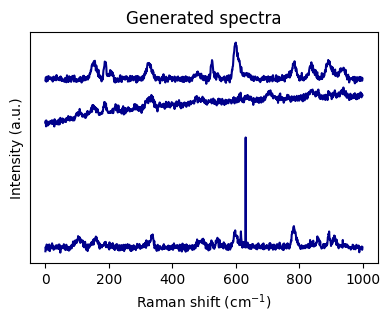

In [58]:
plt.figure(figsize=(4.5, 3))
rp.plot.spectra(list(selected_mixtures.spectral_data), plot_type='single stacked', color='darkblue', title='Generated spectra')

plt.savefig('generated_data.png', dpi=1200, bbox_inches='tight', transparent=True)